<a href="https://colab.research.google.com/github/davidjonathan01/ComparacionModelosPredictivos_CompraBicicletas/blob/main/PrediccionCompraBicicletas_MetodlogiaSEMMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paso 1: MUESTRA

**1.1 Cargue el conjunto de datos.**

Cargue el conjunto de datos. Comprueba su tamaño. Eche un vistazo preliminar a los datos. Muestreo de los datos si es necesario. Dividirlo en conjuntos de entrenamiento y validación.

*   1.1 Cargar el conjunto de datos Primero, descomprimamos el archivo proporcionado y carguemos el conjunto de datos.




In [ ]:
import pandas as pd
import numpy as np
data_input=pd.read_csv('Ejercicio_Aplicacion_SEMMA.csv')
data_input.head(3)

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,Age,...,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,Region,BikeBuyer
0,11000,26,AW00011000,NaN,Jon,V,Yang,0,6/10/1986,38,...,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,19/1/2011,1-2 Miles,Pacific,1
1,11001,37,AW00011001,NaN,Eugene,L,Huang,0,10/5/1991,33,...,Cadre,0,1,2243 W St.,NaN,1 (11) 500 555-0110,15/1/2011,0-1 Miles,Pacific,1
2,11002,31,AW00011002,NaN,Ruben,NaN,Torres,0,9/2/1986,39,...,Cadre,1,1,5844 Linden Land,NaN,1 (11) 500 555-0184,7/1/2011,2-5 Miles,Pacific,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




*   CustomerKey : ID único del cliente dentro del sistema (clave primaria).
*   GeographyKey : ID de la región geográfica del cliente (relacionado a otra tabla de regiones).
*   CustomerAlternateKey : 	Identificador alternativo del cliente (como un código de cliente externo).
*   Title : Título
*   FirstName : Nombre del cliente.
*   MiddleName : Segundo nombre.
*   LastName : Apellido del cliente.
*   NameStyle : Estilo del nombre: 0 (occidental), 1 (oriental o alternativo).
*   BirthDate	: Fecha de nacimiento del cliente
*   MaritalStatus : Estado civil: S (soltero), M (casado).
*   Suffix : Sufijo del nombre (Jr., Sr., III, etc.).
*   Gender : Género del cliente (M o F).
*   EmailAddress : Correo electrónico del cliente.
*   Phone : Número telefónico.
*   AddressLine1 : Dirección principal del cliente.
*   AddressLine2 : Segunda línea de dirección (opcional).
*   YearlyIncome : ingreso anual del cliente.
*   EnglishOccupation : Ocupación del cliente (en inglés).
*   SpanishOccupation : Ocupación del cliente (en español).
*   FrenchOccupation : Ocupación del cliente (en francés).
*   EnglishEducation : Nivel educativo del cliente (en inglés).
*   SpanishEducation : Nivel educativo (en español).
*   FrenchEducation : Nivel educativo (en francés).
*   HouseOwnerFlag : 1 si el cliente es dueño de su casa, 0 si no.
*   NumberCarsOwned : Número de autos que posee el cliente.
*   TotalChildren : Número total de hijos.
*   NumberChildrenAtHome : Hijos que viven en el mismo hogar.
*   DateFirstPurchase : Fecha de la primera compra del cliente.
*   CommuteDistance : Distancia típica que recorre para ir al trabajo (categorías como 0-1 Miles, 1-2 Miles, etc.).
*   Region : Región geográfica (ej. Pacific, Europe, etc.).
*   BikeBuyer : Variable objetivo: 1 si compró una bicicleta, 0 si no.




**1.2 Verificar el tamaño del conjunto de datos# Nueva sección**

*   A continuación, verifiquemos el tamaño del conjunto de datos.

In [ ]:
num_rows, num_columns=data_input.shape
print(f"existen {num_rows} filas y {num_columns} columnas")

existen 18484 filas y 32 columnas


**1.3 Partición de datos**


* Para asegurarnos de tener un conjunto para validar nuestro modelo más adelante, debemos dividir los datos en un conjunto de entrenamiento y un conjunto de validación (o prueba). Una práctica común es asignar entre el 70% y el 80% de los datos para capacitación y el resto para validación. Para este análisis, utilicemos una división 80-20.



In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and validation sets (80-20 split)
train_data, validation_data = train_test_split(data_input, test_size=0.2, random_state=42)

# Checking the size of the training and validation datasets
train_size = train_data.shape[0]
validation_size = validation_data.shape[0]

train_size, validation_size

(14787, 3697)

*  Conjunto de entrenamiento: 14787 entradas Conjunto de validación: 3697 entradas Una vez completado el paso "Muestra", pasaremos a la fase "Explorar", donde analizaremos la distribución, las estadísticas y las visualizaciones del conjunto de datos para comprender mejor su estructura y características.

# Paso 2: EXPLORAR



* Calcular estadísticas resumidas. Visualice la distribución de características clave. Compruebe si hay anomalías en los datos, como valores faltantes y valores atípicos.

* 2.1 Estadísticas resumidas



In [ ]:
# Computing summary statistics for the training data
summary_statistics = train_data.describe()

summary_statistics

,CustomerKey,GeographyKey,NameStyle,Age,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,BikeBuyer
count,3168.000000,3168.000000,3167.0,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000
mean,12996.439394,262.640152,0.0,40.354594,58616.987686,1.805178,1.034102,0.741711,1.449005,0.494159
std,1140.063512,198.018412,0.0,11.469931,33111.645241,1.619605,1.540188,0.437763,1.150889,0.500045
min,11000.000000,2.000000,0.0,23.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12005.750000,65.000000,0.0,31.000000,30000.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,12998.500000,243.000000,0.0,38.000000,60000.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,13985.250000,348.000000,0.0,48.000000,80000.000000,3.000000,2.000000,1.000000,2.000000,1.000000
max,14960.000000,654.000000,0.0,92.000000,170000.000000,5.000000,5.000000,1.000000,4.000000,1.000000


* 2.2 Visualización
* A continuación, visualizaremos la distribución de características clave como edad, numero de autos, total de hijos, tabla

<ipython-input-6-d00a49d6b718>:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_data['BirthDate'] = pd.to_datetime(train_data['BirthDate'], errors='coerce')


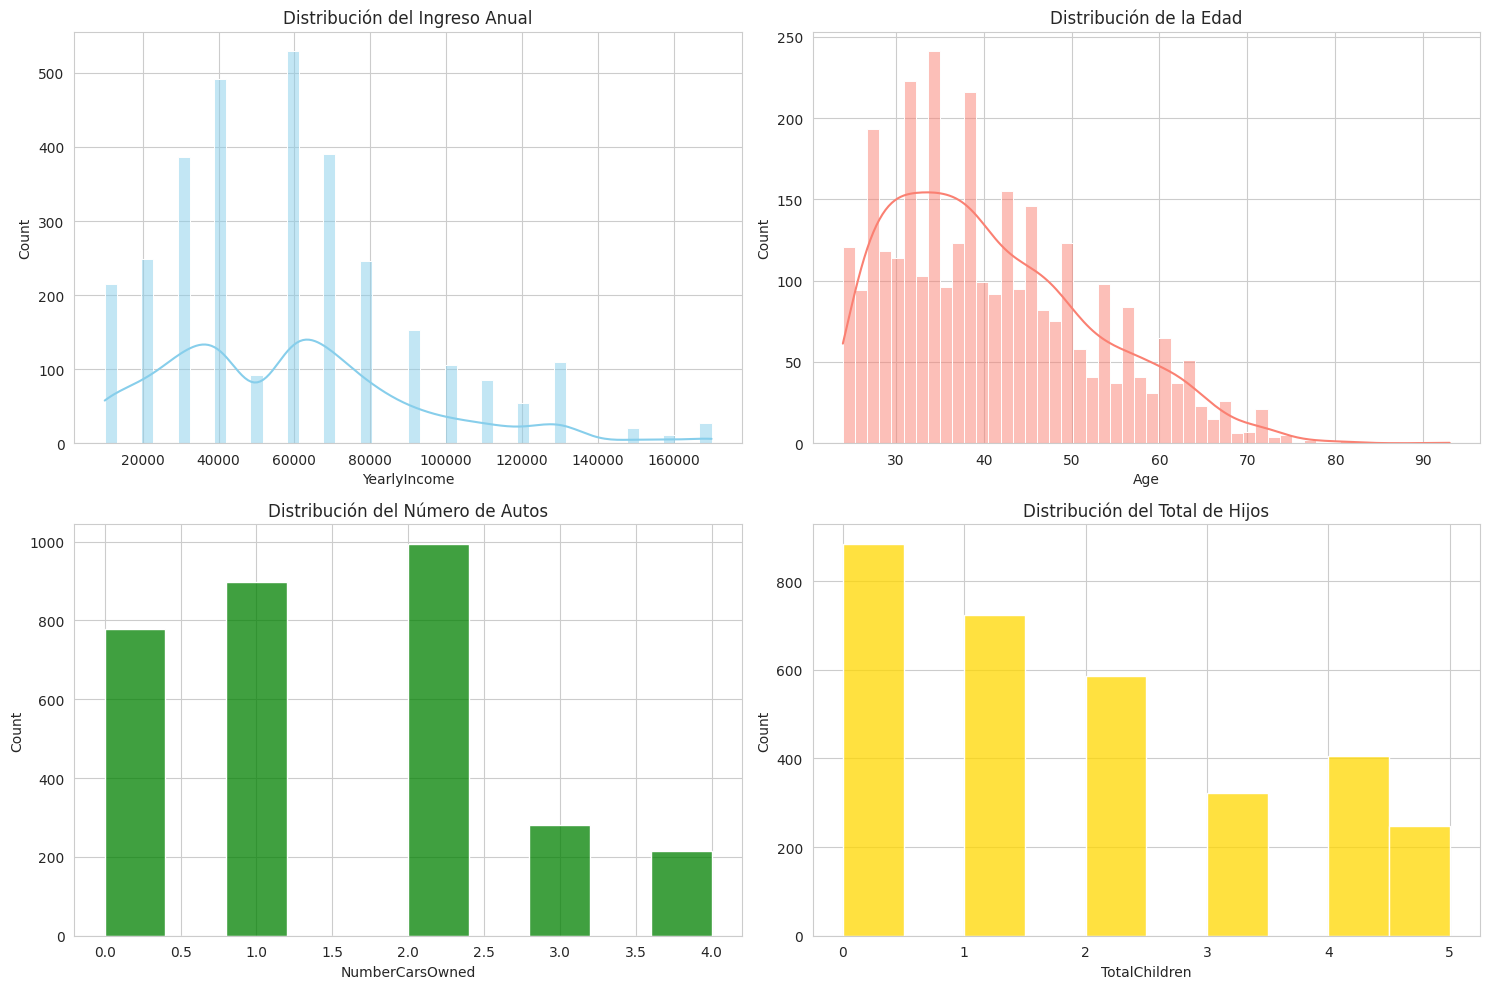

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


train_data['BirthDate'] = pd.to_datetime(train_data['BirthDate'], errors='coerce')
train_data['Age'] = 2025 - train_data['BirthDate'].dt.year


sns.set_style("whitegrid")


plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
sns.histplot(train_data['YearlyIncome'], bins=50, color='skyblue', kde=True)
plt.title('Distribución del Ingreso Anual')


plt.subplot(2, 2, 2)
sns.histplot(train_data['Age'].dropna(), bins=50, color='salmon', kde=True)
plt.title('Distribución de la Edad')


plt.subplot(2, 2, 3)
sns.histplot(train_data['NumberCarsOwned'], bins=10, color='green', kde=False)
plt.title('Distribución del Número de Autos')


plt.subplot(2, 2, 4)
sns.histplot(train_data['TotalChildren'], bins=10, color='gold', kde=False)
plt.title('Distribución del Total de Hijos')


plt.tight_layout()
plt.show()

📊 Distribución del Ingreso Anual (YearlyIncome)
La mayoría de los clientes tiene un ingreso anual entre 20,000 y 80,000, con un pico notable alrededor de 60,000. También se observa una menor concentración de clientes con ingresos superiores a los $100,000, lo que sugiere la existencia de un grupo reducido de alto poder adquisitivo.

👵 Distribución de la Edad (Age)
La edad de los clientes se concentra mayormente entre los 25 y 45 años, con un pico en torno a los 35 años. La distribución muestra una caída progresiva a partir de los 50 años, indicando que la base de clientes está conformada principalmente por adultos jóvenes y de mediana edad.

🚗 Distribución del Número de Autos (NumberCarsOwned)
La mayoría de los clientes posee entre 0 y 2 autos, siendo más común tener exactamente 2 autos. La cantidad de personas que posee más de 2 vehículos disminuye considerablemente, lo que sugiere que tener muchos autos no es lo habitual entre los clientes.

👶 Distribución del Total de Hijos (TotalChildren)
Una gran parte de los clientes no tiene hijos, seguido por aquellos que tienen 1 o 2 hijos. La frecuencia disminuye conforme aumenta el número de hijos, lo cual indica que la mayoría de los hogares en la base de datos son pequeños o sin hijos.

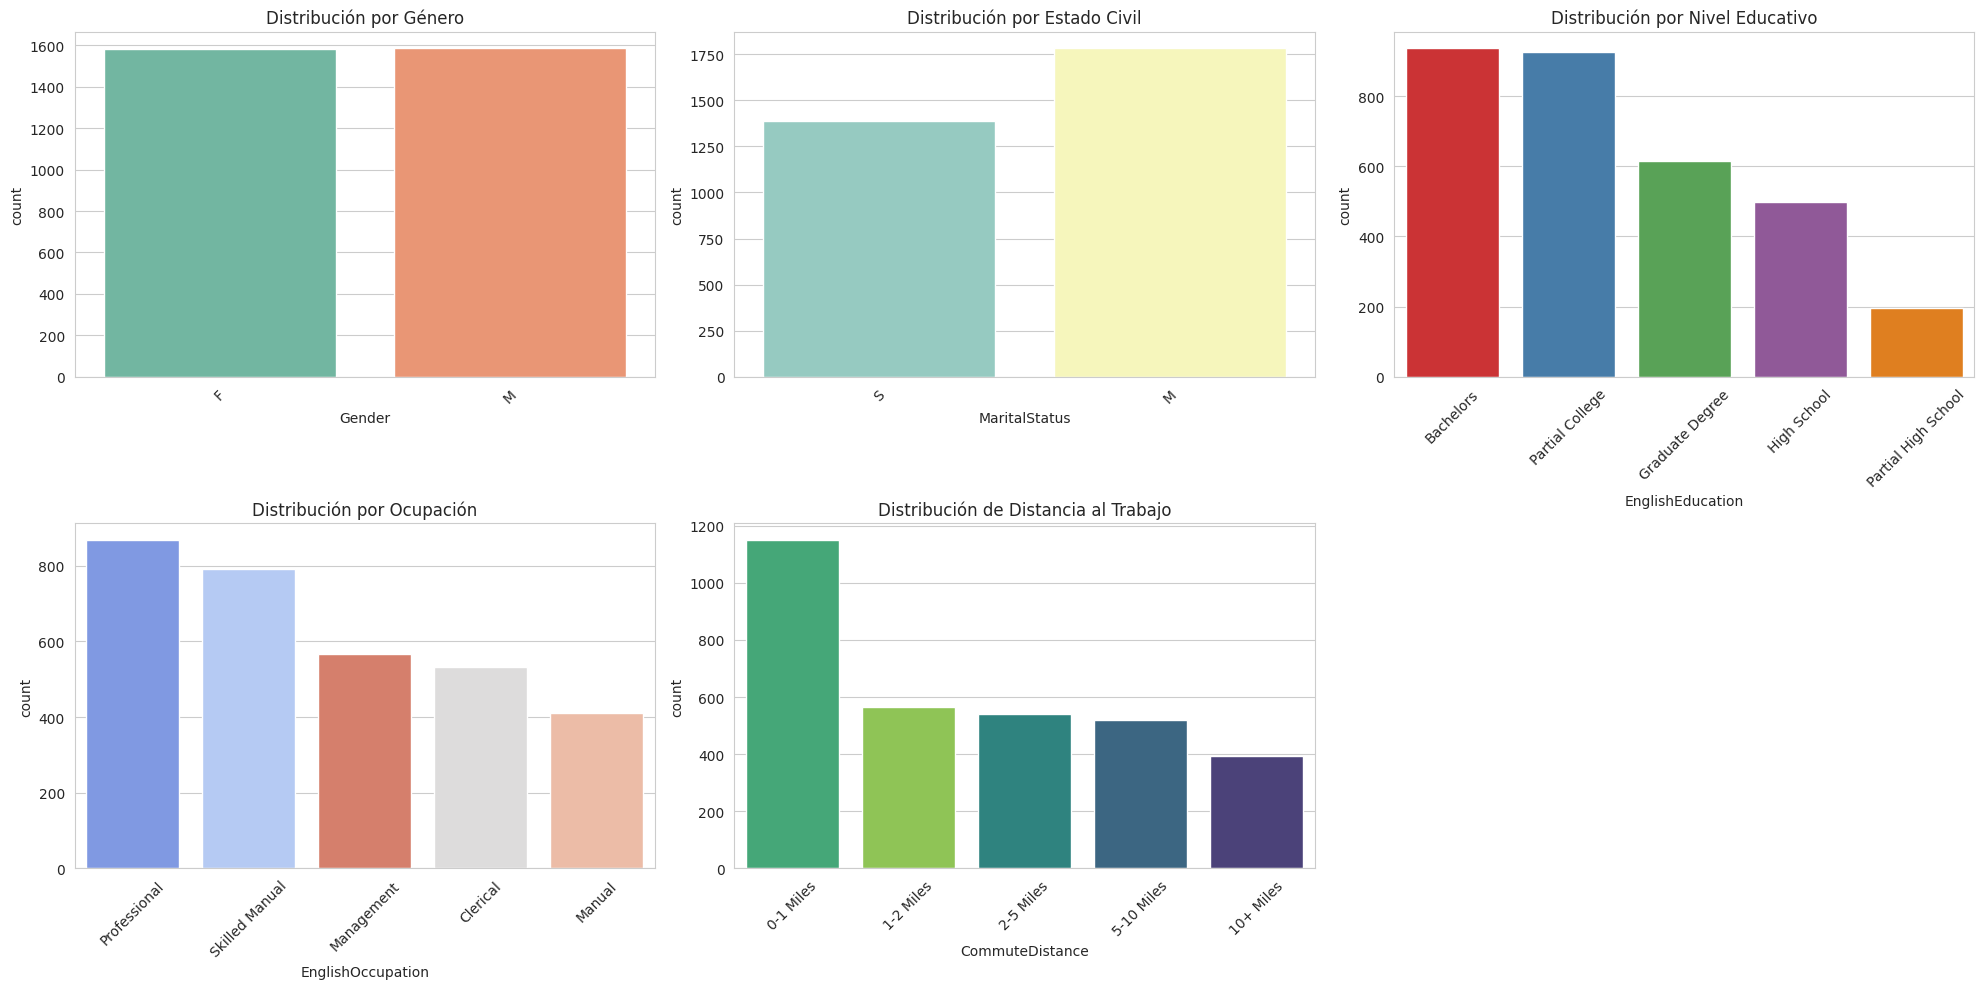

In [ ]:
plt.figure(figsize=(20, 10))

# Género
plt.subplot(2, 3, 1)
sns.countplot(data=train_data, x='Gender', hue='Gender', palette='Set2', legend=False)
plt.title('Distribución por Género')
plt.xticks(rotation=45)

# Estado civil
plt.subplot(2, 3, 2)
sns.countplot(data=train_data, x='MaritalStatus', hue='MaritalStatus', palette='Set3', legend=False)
plt.title('Distribución por Estado Civil')
plt.xticks(rotation=45)

# Educación
plt.subplot(2, 3, 3)
edu_order = train_data['EnglishEducation'].value_counts().index
sns.countplot(data=train_data, x='EnglishEducation', hue='EnglishEducation', order=edu_order, palette='Set1', legend=False)
plt.title('Distribución por Nivel Educativo')
plt.xticks(rotation=45)

# Ocupación
plt.subplot(2, 3, 4)
occ_order = train_data['EnglishOccupation'].value_counts().index
sns.countplot(data=train_data, x='EnglishOccupation', hue='EnglishOccupation', order=occ_order, palette='coolwarm', legend=False)
plt.title('Distribución por Ocupación')
plt.xticks(rotation=45)

# Distancia al trabajo
plt.subplot(2, 3, 5)
commute_order = train_data['CommuteDistance'].value_counts().index
sns.countplot(data=train_data, x='CommuteDistance', hue='CommuteDistance', order=commute_order, palette='viridis', legend=False)
plt.title('Distribución de Distancia al Trabajo')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Género: La cantidad de hombres y mujeres es aproximadamente equilibrada, con una ligera mayoría masculina.

Estado Civil: Predominan las personas casadas, seguidas por los solteros y divorciados.

Nivel Educativo (EnglishEducation): La mayoría tiene un título universitario o algún título profesional, con pocos teniendo solo secundaria.

Ocupación (EnglishOccupation): Las ocupaciones técnicas y profesionales son las más comunes.

Distancia al trabajo (CommuteDistance): Muchas personas viven a menos de 10 millas de su trabajo, aunque también hay un número considerable a más de 10 millas.



*   2.3 Anomalías de datos
*   A continuación, debemos investigar posibles anomalías, como:
*   Edades anormales



Estadísticas descriptivas de Age:
count    3167.000000
mean       41.065993
std        11.484577
min        24.000000
25%        32.000000
50%        39.000000
75%        48.000000
max        93.000000
Name: Age, dtype: float64 

Estadísticas descriptivas de HouseOwnerFlag:
count    3167.000000
mean        0.741711
std         0.437763
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: HouseOwnerFlag, dtype: float64 

Valores únicos en HouseOwnerFlag: [ 0.  1. nan] 

Estadísticas descriptivas de BikeBuyer:
count    3167.000000
mean        0.494159
std         0.500045
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: BikeBuyer, dtype: float64 

Valores únicos en BikeBuyer: [ 0.  1. nan] 



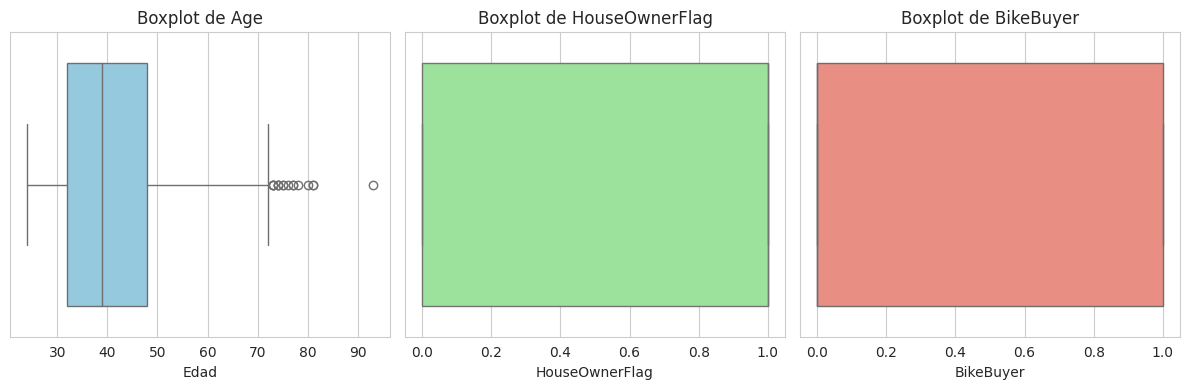

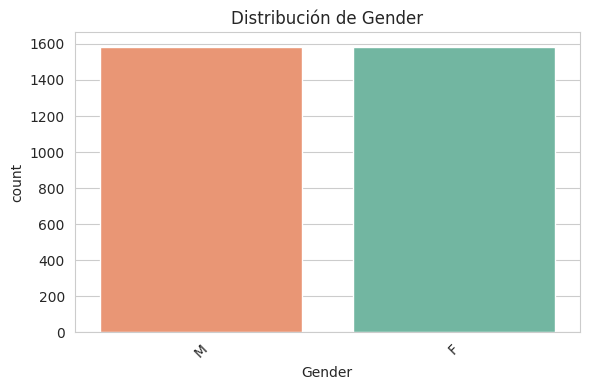

Conteo de categorías en Gender:
Gender
M    1585
F    1582
Name: count, dtype: int64 



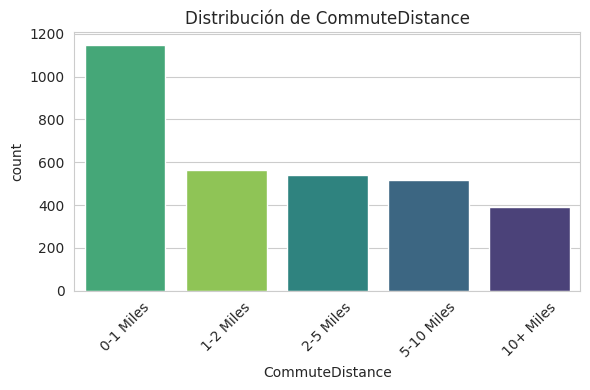

Conteo de categorías en CommuteDistance:
CommuteDistance
0-1 Miles     1150
1-2 Miles      566
2-5 Miles      540
5-10 Miles     519
10+ Miles      392
Name: count, dtype: int64 



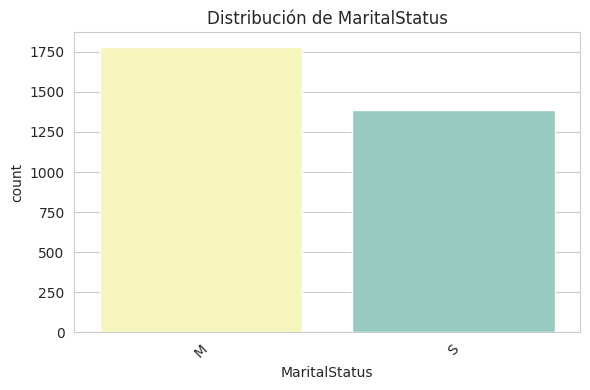

Conteo de categorías en MaritalStatus:
MaritalStatus
M    1782
S    1385
Name: count, dtype: int64 



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



train_data['BirthDate'] = pd.to_datetime(train_data['BirthDate'], errors='coerce')
train_data['Age'] = 2025 - train_data['BirthDate'].dt.year

# ---------------------------
# Análisis de columnas numéricas
# ---------------------------

# 1. Age: Boxplot y estadísticas descriptivas
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(x=train_data['Age'], color='skyblue')
plt.title('Boxplot de Age')
plt.xlabel('Edad')
plt.tight_layout()
print("Estadísticas descriptivas de Age:")
print(train_data['Age'].describe(), "\n")

# 2. HouseOwnerFlag: Boxplot y estadísticas descriptivas
plt.subplot(1, 3, 2)
sns.boxplot(x=train_data['HouseOwnerFlag'], color='lightgreen')
plt.title('Boxplot de HouseOwnerFlag')
plt.xlabel('HouseOwnerFlag')
plt.tight_layout()
print("Estadísticas descriptivas de HouseOwnerFlag:")
print(train_data['HouseOwnerFlag'].describe(), "\n")
print("Valores únicos en HouseOwnerFlag:", train_data['HouseOwnerFlag'].unique(), "\n")

# 3. BikeBuyer: Boxplot y estadísticas descriptivas
plt.subplot(1, 3, 3)
sns.boxplot(x=train_data['BikeBuyer'], color='salmon')
plt.title('Boxplot de BikeBuyer')
plt.xlabel('BikeBuyer')
plt.tight_layout()
print("Estadísticas descriptivas de BikeBuyer:")
print(train_data['BikeBuyer'].describe(), "\n")
print("Valores únicos en BikeBuyer:", train_data['BikeBuyer'].unique(), "\n")

plt.show()

# ---------------------------
# Análisis de columnas categóricas
# ---------------------------

# Función para graficar y mostrar los conteos
def plot_categorical(column, palette, title):
    plt.figure(figsize=(6,4))
    order = train_data[column].value_counts().index
    sns.countplot(data=train_data, x=column, order=order, palette=palette, hue=column, legend=False)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print(f"Conteo de categorías en {column}:")
    print(train_data[column].value_counts(), "\n")

# 4. Gender
plot_categorical('Gender', palette='Set2', title='Distribución de Gender')

# 5. CommuteDistance
plot_categorical('CommuteDistance', palette='viridis', title='Distribución de CommuteDistance')

# 6. MaritalStatus
plot_categorical('MaritalStatus', palette='Set3', title='Distribución de MaritalStatus')




*   No se encuentran anomalias en los valores encontrados, se busco si existian valores diferentes a 0 o 1 en los campos de decisión



In [ ]:

valores_faltantes = train_data.isnull().sum()

valores_faltantes

,0
CustomerKey,0
GeographyKey,0
CustomerAlternateKey,0
Title,3154
FirstName,0
MiddleName,1322
LastName,1
NameStyle,1
BirthDate,1
Age,1




*   Para resumir nuestra exploración:
*   Hemos analizado las distribuciones de características clave y los patrones observados. Identificamos valores nulos en algunas columnas. La siguiente fase del proceso SEMMA es "Modificar". En este paso, abordaremos estas casuisticas en los datos que hemos identificado, realizaremos una limpieza de datos.


# Paso 3: MODIFICAR



*   En esta fase, abordaremos las anomalías de los datos y los prepararemos para el modelado. Específicamente, haremos:


*   Maneje de las columnas y filas con valores nulos encontrados y selección de columnas finales


*   Comencemos reemplazando los valores cero.




In [ ]:
#Columnas con valores nulos

data_input.drop(
    columns={"AddressLine2","Suffix","MiddleName","Title"} ,inplace=True
)

In [ ]:
#Columnas que no aportan valor significativo

data_input.drop(
    columns={'CustomerKey','CustomerAlternateKey','LastName', 'NameStyle'
             ,'EmailAddress','Phone','AddressLine1','DateFirstPurchase','FirstName','BirthDate'} ,inplace=True
)



In [ ]:
#Borrramos columas como idiomas que repiten datos pero en otro idioma y nos quedamos con el de español
data_input.drop(
    columns={'EnglishEducation','FrenchEducation', 'EnglishOccupation','FrenchOccupation'} ,inplace=True
)

In [ ]:
data_input.columns

Index(['GeographyKey', 'Age', 'MaritalStatus', 'Gender', 'YearlyIncome',
       'TotalChildren', 'NumberChildrenAtHome', 'SpanishEducation',
       'SpanishOccupation', 'HouseOwnerFlag', 'NumberCarsOwned',
       'CommuteDistance', 'Region', 'BikeBuyer'],
      dtype='object')

In [ ]:

data_input.head(3)

,GeographyKey,Age,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,SpanishEducation,SpanishOccupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,BikeBuyer
0,26,38.0,M,M,90000.0,2.0,0.0,Licenciatura,Profesional,1.0,0.0,1-2 Miles,Pacific,1.0
1,37,33.0,S,M,60000.0,3.0,3.0,Licenciatura,Profesional,0.0,1.0,0-1 Miles,Pacific,1.0
2,31,39.0,M,M,60000.0,3.0,3.0,Licenciatura,Profesional,1.0,1.0,2-5 Miles,Pacific,1.0



*   En base al analisis realizado anteriormente, extrapolando a este dataframe tenemos que enfocarnos en la columna age. Haremos uso de la mediana agrupando por genero y ocupación para completar estos valores faltantes.




In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Convertir la columna 'MaritalStatus' a 0 y 1 (# Ahora, 'M' será 0 y 'S' será 1)
data_input['MaritalStatus'] = label_encoder.fit_transform(data_input['MaritalStatus'])

# Convertir la columna 'Gender' a 0 y 1 (# Ahora, 'M' será 1 y 'F' será 0)
label_encoder2 = LabelEncoder()

data_input['Gender'] = label_encoder.fit_transform(data_input['Gender'])


#Variables dummies para estas 3 columnas
model= OneHotEncoder()
dummie= model.fit_transform(data_input[['SpanishEducation','SpanishOccupation','Region']]).toarray()

df_dummie= pd.DataFrame(dummie,columns=model.get_feature_names_out(['SpanishEducation','SpanishOccupation','Region']))

df_consolidado= pd.concat([data_input,df_dummie], axis=1)
#Eliminamos las columnas que dieron origen a las variables dummines porque ya no es necesario tenerlas
df_consolidado.drop(
    columns={'SpanishEducation','SpanishOccupation','Region'} ,inplace=True
)


# Reemplazar los valores en la columna 'CommuteDistance' con los números promedios de sus rangos
df_consolidado['CommuteDistance'] = df_consolidado['CommuteDistance'].replace({
    '0-1 Miles': 0.5,
    '1-2 Miles': 1.5,
    '2-5 Miles': 3.5,
    '5-10 Miles': 7.5,
    '10+ Miles': 12.5
})
#Columnas pendiente para borrar
df_consolidado.drop(columns=['GeographyKey'],inplace=True)

df_consolidado.to_csv('Ejercicio_Aplicacion_SEMMA_preprocesado.csv', index=False)




<ipython-input-15-d44ff10604c2>:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_consolidado['CommuteDistance'] = df_consolidado['CommuteDistance'].replace({


In [ ]:
df_consolidado

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,BikeBuyer,SpanishEducation_Educación secundaria,SpanishEducation_Educación secundaria (en curso),SpanishEducation_Estudios de postgrado,SpanishEducation_Estudios universitarios (en curso),SpanishEducation_Licenciatura,SpanishOccupation_Administrativo,SpanishOccupation_Gestión,SpanishOccupation_Obrero,SpanishOccupation_Obrero especializado,SpanishOccupation_Profesional,Region_Europe,Region_North America,Region_Pacific
0,0,1,90000,2,0,1,0,1.5,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,1,60000,3,3,0,1,0.5,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,1,60000,3,3,1,1,3.5,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,0,70000,0,0,0,1,7.5,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,0,80000,5,5,1,4,1.5,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479,0,1,30000,1,0,1,0,0.5,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18480,1,0,30000,3,0,1,0,0.5,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18481,1,1,30000,3,0,0,0,0.5,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18482,0,1,30000,3,0,1,0,0.5,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


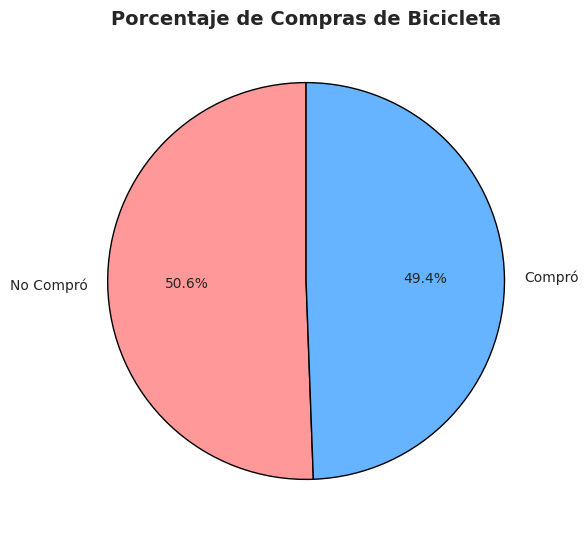

In [ ]:

bike_counts = train_data['BikeBuyer'].value_counts().sort_index()


labels = ['No Compró', 'Compró']
colors = ['#ff9999','#66b3ff']


plt.figure(figsize=(6,6))
plt.pie(bike_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Porcentaje de Compras de Bicicleta', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


# Paso 4: MODELADO

## **Caso 1 : Máquina de Modelado de Datos (SVM)**

### 1.1 Preparación de Datos, Entrenamiento y Evaluación

<ipython-input-26-a064f0f88431>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age']=scaled_data2
<ipython-input-26-a064f0f88431>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['YearlyIncome']=scaled_data
<ipython-input-26-a064f0f88431>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Accuracy: 0.7949688936975926
F1-score: 0.7809248554913295

Reporte de Clasificacion:
               precision    recall  f1-score   support

           0       0.77      0.84      0.81      1884
           1       0.82      0.75      0.78      1813

    accuracy                           0.79      3697
   macro avg       0.80      0.79      0.79      3697
weighted avg       0.80      0.79      0.79      3697



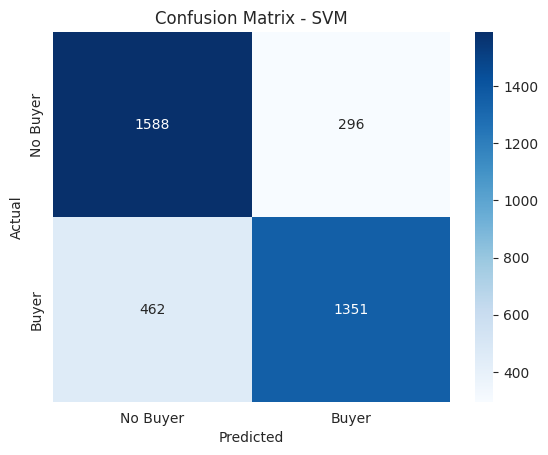

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import accuracy_score ,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('Ejercicio_Aplicacion_SEMMA_preprocesado2.csv')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X= df[['Age','MaritalStatus','YearlyIncome','CommuteDistance','NumberCarsOwned','TotalChildren','NumberChildrenAtHome','Gender', 'Region_Europe',
       'Region_North America', 'Region_Pacific','SpanishEducation_Educación secundaria','HouseOwnerFlag',
       'SpanishEducation_Educación secundaria (en curso)',
       'SpanishEducation_Estudios de postgrado',
       'SpanishEducation_Estudios universitarios (en curso)',
       'SpanishEducation_Licenciatura', 'SpanishOccupation_Administrativo',
       'SpanishOccupation_Gestión', 'SpanishOccupation_Obrero',
       'SpanishOccupation_Obrero especializado',
       'SpanishOccupation_Profesional', 'Años_transc_ultima_compra']]

y= df[['BikeBuyer']]

model=MinMaxScaler()
scaled_data2= model.fit_transform(X[['Age']])
X['Age']=scaled_data2


scaled_data= model.fit_transform(X[['YearlyIncome']])
X['YearlyIncome']=scaled_data

scaled_data6= model.fit_transform(X[['CommuteDistance']])
X['CommuteDistance']=scaled_data6


scaled_data3= model.fit_transform(X[['TotalChildren']])
X['TotalChildren']=scaled_data3

scaled_data4= model.fit_transform(X[['NumberChildrenAtHome']])
X['NumberChildrenAtHome']=scaled_data4

scaled_data7= model.fit_transform(X[['Años_transc_ultima_compra']])
X['Años_transc_ultima_compra']=scaled_data7

scaled_data8= model.fit_transform(X[['NumberCarsOwned']])
X['NumberCarsOwned']=scaled_data8

# Dividir en train/test (80-20)
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2,random_state=42)


# Entrenar modelo SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predicciones
y_pred = svm_model.predict(X_test)


# Calcular precisión
accuracy_SVM = accuracy_score(y_test,y_pred)
precision_metric_SVM = precision_score(y_test, y_pred)
recall_metric_SVM = recall_score(y_test, y_pred)
f1_metric_SVM = f1_score(y_test, y_pred)

# Evaluación
print("Accuracy:", accuracy_SVM)
print("F1-score:", f1_metric_SVM )
print("\nReporte de Clasificacion:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Buyer', 'Buyer'], yticklabels=['No Buyer', 'Buyer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()



1. **Accuracy = 79%** : El modelo predice correctamente si una persona comprará o no una bicicleta en el 79% de los casos.
2. **F1-score = 78%** : Un F1 de 0.78 indica que el modelo tiene un buen equilibrio no solo acierta o se acerca bastante cuando dice que alguien va a comprar, sino que también no se le omiten compradores reales.

 **Matriz de confusión:**
*   De las 1813 personas que realmente compraron, el modelo acertó con 1351, pero falló en 462 (las clasificó como no compradores).
*   De las 1884 personas que no compraron, acertó con 1588, pero falló en 296 (falsos positivos).

*   El modelo predice mejor a los que no compran que a los que sí, ya que comete menos errores en esa clase.

### 1.2 Prueba de Datos

## **Caso 2: Aplicación de Regresión Logística**


### 2.1 Preparación de Datos

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar datos (asumiendo que ya están preprocesados como en tu muestra)
df = pd.read_csv('Ejercicio_Aplicacion_SEMMA_preprocesado2.csv')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X= df[['Age','MaritalStatus','YearlyIncome','CommuteDistance','NumberCarsOwned','TotalChildren','NumberChildrenAtHome','Gender', 'Region_Europe',
       'Region_North America', 'Region_Pacific','SpanishEducation_Educación secundaria','HouseOwnerFlag',
       'SpanishEducation_Educación secundaria (en curso)',
       'SpanishEducation_Estudios de postgrado',
       'SpanishEducation_Estudios universitarios (en curso)',
       'SpanishEducation_Licenciatura', 'SpanishOccupation_Administrativo',
       'SpanishOccupation_Gestión', 'SpanishOccupation_Obrero',
       'SpanishOccupation_Obrero especializado',
       'SpanishOccupation_Profesional', 'Años_transc_ultima_compra']]
y= df[['BikeBuyer']]

model=MinMaxScaler()
scaled_data2= model.fit_transform(X[['Age']])
X['Age']=scaled_data2


scaled_data= model.fit_transform(X[['YearlyIncome']])
X['YearlyIncome']=scaled_data

scaled_data6= model.fit_transform(X[['CommuteDistance']])
X['CommuteDistance']=scaled_data6


scaled_data3= model.fit_transform(X[['TotalChildren']])
X['TotalChildren']=scaled_data3

scaled_data4= model.fit_transform(X[['NumberChildrenAtHome']])
X['NumberChildrenAtHome']=scaled_data4

scaled_data7= model.fit_transform(X[['Años_transc_ultima_compra']])
X['Años_transc_ultima_compra']=scaled_data7

scaled_data8= model.fit_transform(X[['NumberCarsOwned']])
X['NumberCarsOwned']=scaled_data8

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2,random_state=42)

<ipython-input-116-99e9bb2b5333>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age']=scaled_data2
<ipython-input-116-99e9bb2b5333>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['YearlyIncome']=scaled_data
<ipython-input-116-99e9bb2b5333>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

### 2.2 Entrenamiento del Modelo de Regresión Logística:

In [ ]:
# Crear y entrenar el modelo
logreg = LogisticRegression(solver='liblinear',random_state=16)
logreg.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[::, 1]  # Probabilidades para la clase positiva

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 2.3 Evaluación del Modelo

=== Métricas del modelo de Regresión Logística ===
Accuracy: 0.7303
Precision: 0.7556
Recall: 0.6652
F1-score: 0.7075


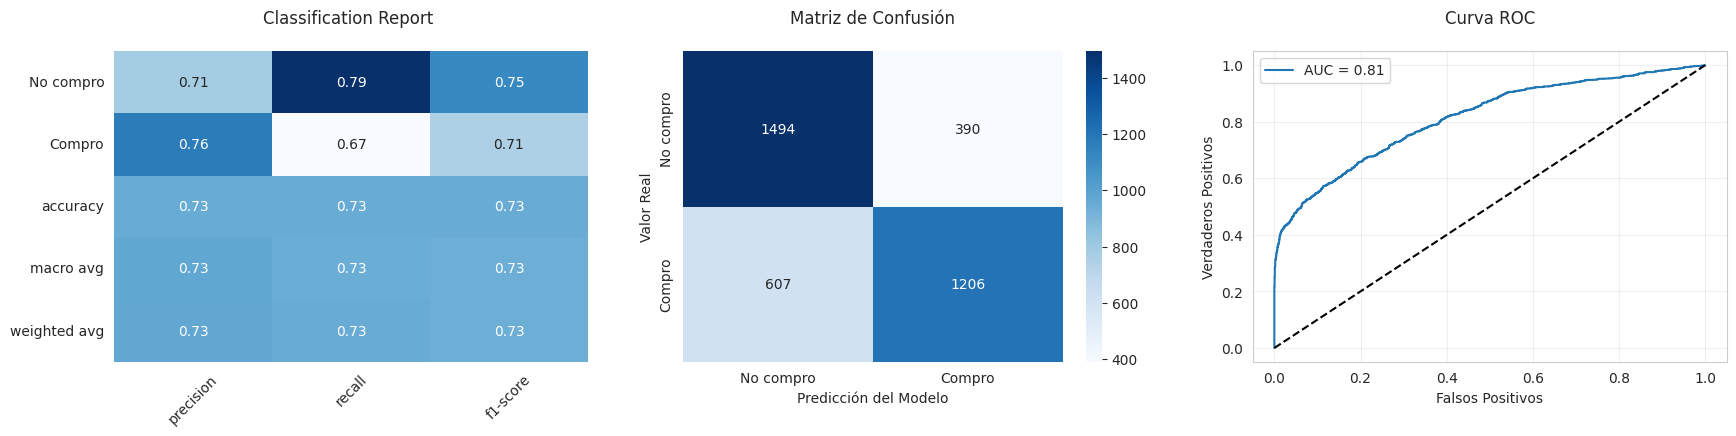

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Definir nombres de las clases
class_names = ["No compro", "Compro"]  # Cambia esto según tus categorías

# Calcular métricas y guardarlas con nombre específico para Regresión Logística
accuracy_rl = accuracy_score(y_test, y_pred)
precision_rl = precision_score(y_test, y_pred)
recall_rl = recall_score(y_test, y_pred)
f1_rl = f1_score(y_test, y_pred)

# Mostrar métricas
print("=== Métricas del modelo de Regresión Logística ===")
print(f"Accuracy: {accuracy_rl:.4f}")
print(f"Precision: {precision_rl:.4f}")
print(f"Recall: {recall_rl:.4f}")
print(f"F1-score: {f1_rl:.4f}")

# --- Visualizaciones ---
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar figura con 3 subplots
plt.figure(figsize=(18, 5))

# --- Classification Report ---
plt.subplot(1, 3, 1)
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues', cbar=False)
plt.title("Classification Report ", pad=20)
plt.xticks(rotation=45)

# --- Matriz de Confusión ---
plt.subplot(1, 3, 2)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión', pad=20)

# --- Curva ROC ---
plt.subplot(1, 3, 3)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Curva ROC', pad=20)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout(pad=3.0)
plt.show()


### 2.4 Interpretación de coeficientes

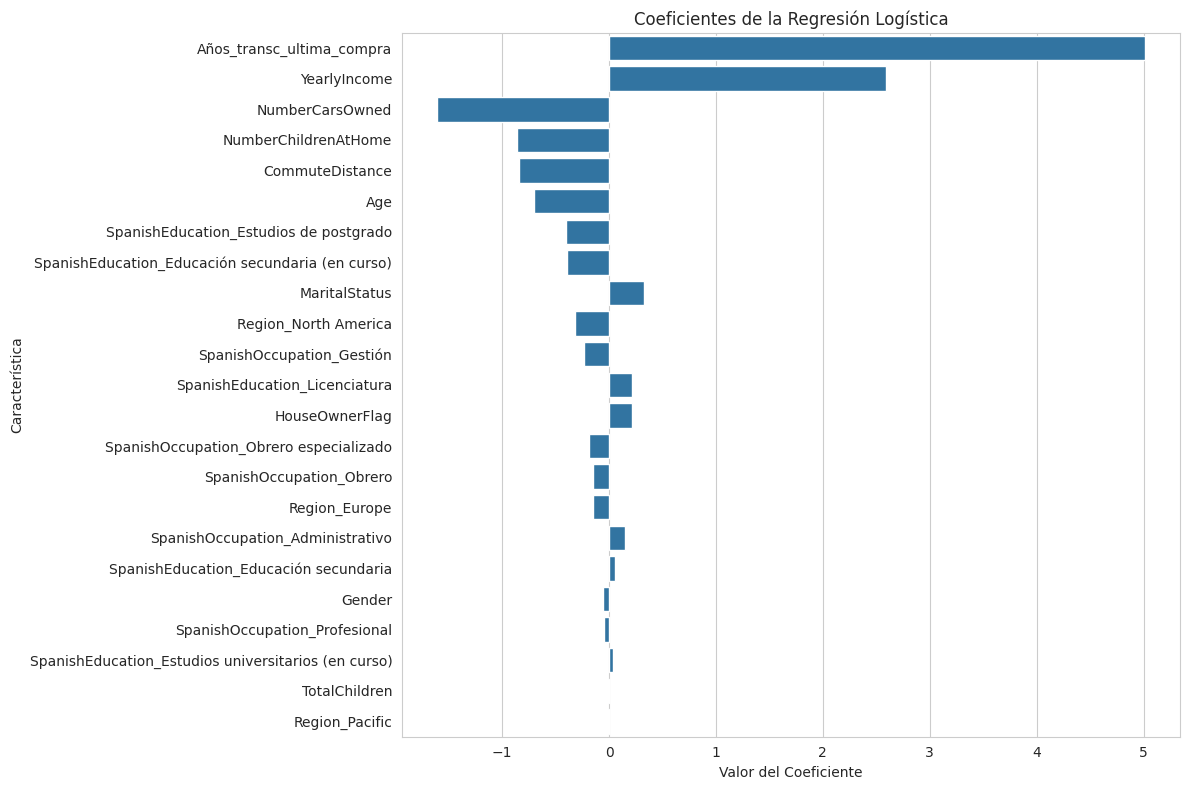


Coeficientes más importantes y su interpretación:
                                              Feature  Coefficient  \
22                          Años_transc_ultima_compra     5.010155   
2                                        YearlyIncome     2.588326   
4                                     NumberCarsOwned    -1.606026   
6                                NumberChildrenAtHome    -0.863045   
3                                     CommuteDistance    -0.838659   
0                                                 Age    -0.698155   
14             SpanishEducation_Estudios de postgrado    -0.399025   
13   SpanishEducation_Educación secundaria (en curso)    -0.392582   
1                                       MaritalStatus     0.322962   
9                                Region_North America    -0.320250   
18                          SpanishOccupation_Gestión    -0.236513   
16                      SpanishEducation_Licenciatura     0.216850   
12                                     

In [ ]:
# Obtener coeficientes y crear DataFrame para análisis
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0],
    'Abs_Coefficient': np.abs(logreg.coef_[0]),
    'Odds_Ratio': np.exp(logreg.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

# Visualizar los coeficientes más importantes
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Coeficientes de la Regresión Logística')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

# Mostrar tabla de coeficientes
print("\nCoeficientes más importantes y su interpretación:")
print(coefficients)

## **Caso 3: Aplicación de Random Forest**

### 3.1 Importación de librerías y carga de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Cargar datos
df = pd.read_csv('Ejercicio_Aplicacion_SEMMA_preprocesado2.csv')
df.head()


,Age,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,car,Años_transc_ultima_compra,...,SpanishEducation_Estudios universitarios (en curso),SpanishEducation_Licenciatura,SpanishOccupation_Administrativo,SpanishOccupation_Gestión,SpanishOccupation_Obrero,SpanishOccupation_Obrero especializado,SpanishOccupation_Profesional,Region_Europe,Region_North America,Region_Pacific
0,38,0,1,90000,2,0,1,0,0,14,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,33,1,1,60000,3,3,0,1,1,14,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,39,0,1,60000,3,3,1,1,1,14,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,36,1,0,70000,0,0,0,1,1,14,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,30,1,0,80000,5,5,1,4,1,14,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### 3.2 Preparación de los datos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X= df[['Age','MaritalStatus','YearlyIncome','CommuteDistance','NumberCarsOwned','TotalChildren','NumberChildrenAtHome','Gender', 'Region_Europe',
       'Region_North America', 'Region_Pacific','SpanishEducation_Educación secundaria','HouseOwnerFlag',
       'SpanishEducation_Educación secundaria (en curso)',
       'SpanishEducation_Estudios de postgrado',
       'SpanishEducation_Estudios universitarios (en curso)',
       'SpanishEducation_Licenciatura', 'SpanishOccupation_Administrativo',
       'SpanishOccupation_Gestión', 'SpanishOccupation_Obrero',
       'SpanishOccupation_Obrero especializado',
       'SpanishOccupation_Profesional', 'Años_transc_ultima_compra']]
y= df[['BikeBuyer']]

model=MinMaxScaler()
scaled_data2= model.fit_transform(X[['Age']])
X['Age']=scaled_data2


scaled_data= model.fit_transform(X[['YearlyIncome']])
X['YearlyIncome']=scaled_data

scaled_data6= model.fit_transform(X[['CommuteDistance']])
X['CommuteDistance']=scaled_data6


scaled_data3= model.fit_transform(X[['TotalChildren']])
X['TotalChildren']=scaled_data3

scaled_data4= model.fit_transform(X[['NumberChildrenAtHome']])
X['NumberChildrenAtHome']=scaled_data4

scaled_data7= model.fit_transform(X[['Años_transc_ultima_compra']])
X['Años_transc_ultima_compra']=scaled_data7

scaled_data8= model.fit_transform(X[['NumberCarsOwned']])
X['NumberCarsOwned']=scaled_data8

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2,random_state=42)


<ipython-input-33-f704c6dd25ba>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age']=scaled_data2
<ipython-input-33-f704c6dd25ba>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['YearlyIncome']=scaled_data
<ipython-input-33-f704c6dd25ba>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

### 3.3 Entrenamiento del modelo con GridSearchCV

In [ ]:
# Definir el modelo base
rf = RandomForestClassifier(random_state=0)

# Definir la grilla de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=1)

# Entrenar con validación cruzada
grid_search.fit(X_train, y_train)

# Mejor modelo
best_rf = grid_search.best_estimator_
best_rf


Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(min_samples_split=5, random_state=0)

### 3.4 Evaluación del modelo

✅ Accuracy en TEST: 0.8537
✅ Precision en TEST: 0.8622
✅ Recall en TEST: 0.8351
✅ F1-Score en TEST: 0.8484


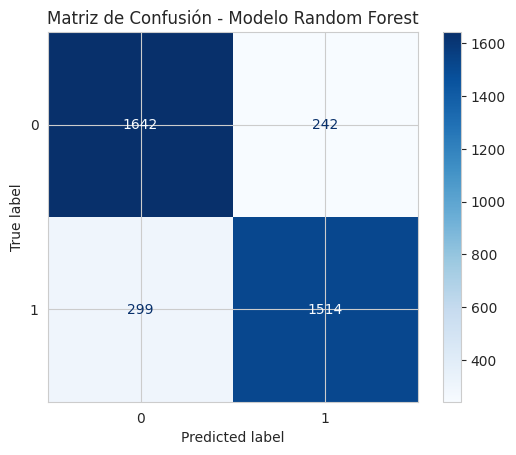


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1884
           1       0.86      0.84      0.85      1813

    accuracy                           0.85      3697
   macro avg       0.85      0.85      0.85      3697
weighted avg       0.85      0.85      0.85      3697



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Predicciones
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Accuracy
test_accuracy_forest  = accuracy_score(y_test, y_test_pred)


print(f"✅ Accuracy en TEST: {test_accuracy_forest :.4f}")

# Métricas adicionales

test_precision_forest = precision_score(y_test, y_test_pred)


test_recall_forest = recall_score(y_test, y_test_pred)

test_f1_forest = f1_score(y_test, y_test_pred)

# Mostrar Precision, Recall y F1

print(f"✅ Precision en TEST: {test_precision_forest:.4f}")

print(f"✅ Recall en TEST: {test_recall_forest:.4f}")

print(f"✅ F1-Score en TEST: {test_f1_forest:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)

# Mostrar la matriz de confusión de manera visual
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Modelo Random Forest")
plt.show()

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_test_pred))


### 3.5 Importancia de las características

In [ ]:
# Importancia de features
feature_importances_df = pd.DataFrame({
    "feature": X.columns,
    "importance": best_rf.feature_importances_
}).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df.head()


,feature,importance
22,Años_transc_ultima_compra,0.283679
0,Age,0.158311
2,YearlyIncome,0.089589
4,NumberCarsOwned,0.071188
3,CommuteDistance,0.068517


### 3.6 Visualización de la importancia de variables

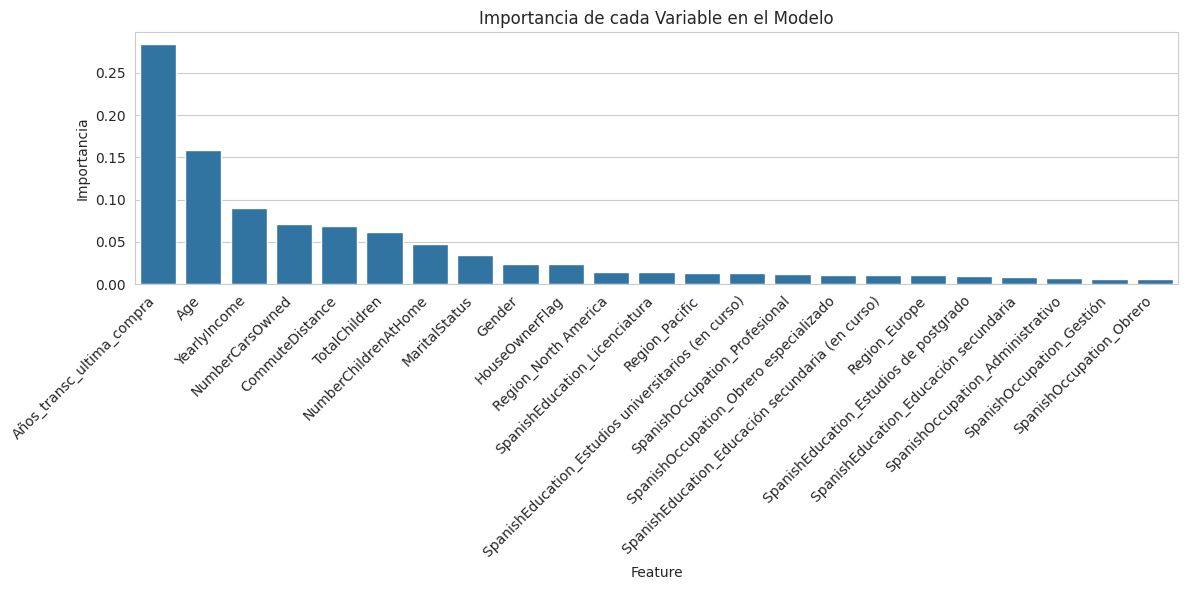

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='feature', y='importance', data=feature_importances_df)
plt.xlabel("Feature")
plt.ylabel("Importancia")
plt.title("Importancia de cada Variable en el Modelo")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### 3.7 Curva ROC   

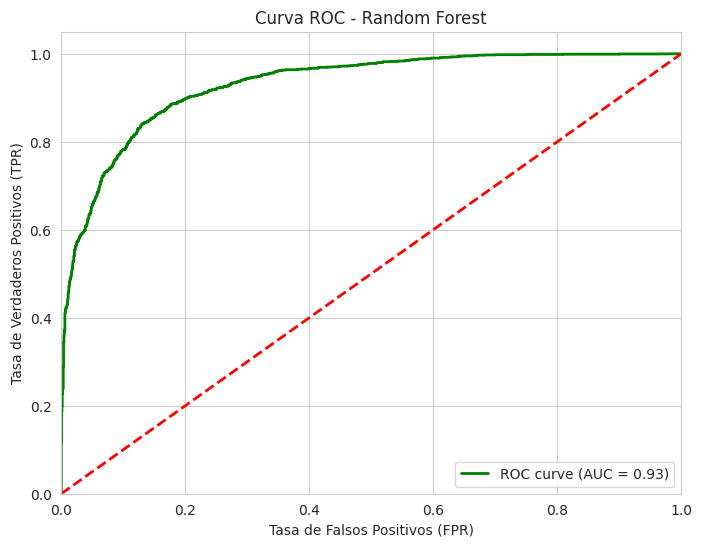

In [ ]:
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de la clase positiva (1)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)

# Calcular el área bajo la curva (AUC)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Línea base
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## **Caso 4: Aplicación de XGBoost**

### 4.1 Importación de librerías y carga de datos

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd  # Para cargar y manipular datos en formato de tabla (DataFrame)
import numpy as np  # Para trabajar con arrays y funciones matemáticas
from sklearn.model_selection import train_test_split  # Para dividir los datos en conjunto de entrenamiento y validación
from sklearn.preprocessing import StandardScaler  # Para escalar los datos antes de entrenar el modelo
from xgboost import XGBClassifier  # El modelo XGBoost utilizado para clasificación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Para calcular y mostrar las métricas de rendimiento
import matplotlib.pyplot as plt  # Para crear gráficos de visualización
import seaborn as sns  # Para hacer gráficos más atractivos, especialmente la matriz de confusión

### 4.2 Cargar Datos Preprocesados

In [ ]:
# Cargar datos preprocesados
df = pd.read_csv('Ejercicio_Aplicacion_SEMMA_preprocesado2.csv')  # Leemos el archivo CSV

### 4.3 Separación de Predictores y Variable Objetivo

In [ ]:
# Separar predictores y variable objetivo
X = df.drop(columns=['BikeBuyer'])  # Las características de entrada (variables predictoras)
y = df['BikeBuyer']  # La variable objetivo que queremos predecir (si compró o no)

### 4.4 Dividir el dataset en entrenamiento y Validación

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.5 Escalada de Datos

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

### 4.6 Crear el Modelo XGBoost con los Hiperparámetros óptimos

In [ ]:
# Crear el modelo XGBoost con los hiperparámetros óptimos
xgb_model = XGBClassifier(
    colsample_bytree=0.7,   # Proporción de características a considerar por cada árbol
    gamma=0.1,              # Regularización para controlar la complejidad
    learning_rate=0.1,      # Tasa de aprendizaje
    max_depth=10,           # Profundidad máxima de los árboles
    min_child_weight=3,     # Peso mínimo de los nodos
    n_estimators=200,       # Número de árboles
    subsample=0.7,          # Fracción de muestras para cada árbol
    random_state=42         # Semilla para la reproducibilidad
)

### 4.7 Entrenar el Modelo y Predecir sobre el Conjunto de Validación

In [ ]:
# Entrenar el modelo
xgb_model.fit(X_train_scaled, y_train)
# Predecir sobre el conjunto de validación
y_pred = xgb_model.predict(X_val_scaled)

### 4.8 Métricas de Rendimiento

In [ ]:
# Métricas de rendimiento
accuracy_xgboost = accuracy_score(y_val, y_pred)
precision_xgboost = precision_score(y_val, y_pred)
recall_xgboost = recall_score(y_val, y_pred)
f1_xgboost = f1_score(y_val, y_pred)

# Mostrar resultados
print(f"📊 Accuracy: {accuracy_xgboost * 100:.2f}%")
print(f"Precisión (Precision): {precision_xgboost:.2f}")
print(f"Sensibilidad (Recall): {recall_xgboost:.2f}")
print(f"F1-Score: {f1_xgboost:.2f}")

📊 Accuracy: 85.31%
Precisión (Precision): 0.86
Sensibilidad (Recall): 0.84
F1-Score: 0.85


### 4.9 Calcular y Visualizar la Matriz de Confusión

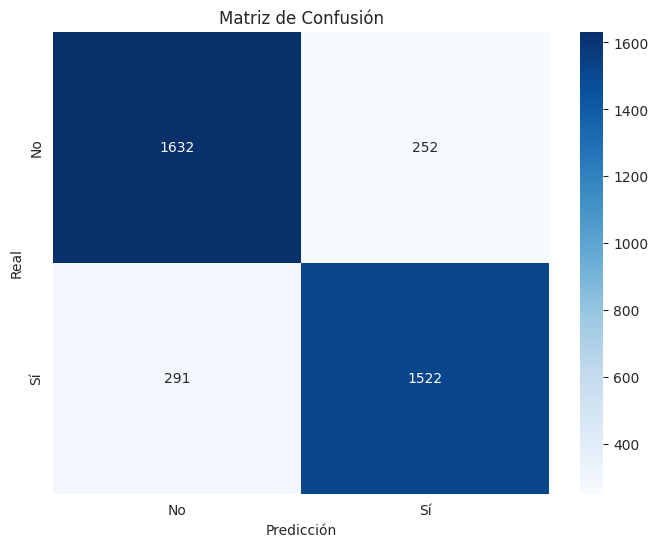

In [ ]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_val, y_pred)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

### 4.10 Curva ROC y AUC

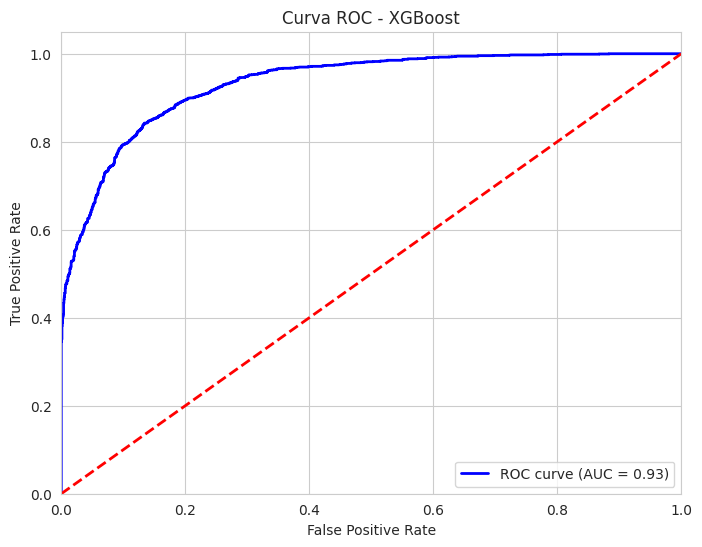

In [ ]:
from sklearn.metrics import roc_curve, auc


# Calcular las probabilidades para la clase positiva (1)


y_proba = xgb_model.predict_proba(X_val_scaled)[:, 1]  # Probabilidades para la clase positiva (1)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_proba)

# Calcular el AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Línea diagonal (referencia)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - XGBoost')
plt.legend(loc='lower right')
plt.show()

## **Caso 5: Aplicación de KNN**

### 5.1 Importación de Bibliotecas Necesarias

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

### 5.2 Carga de Datos Preprocesados

In [ ]:
# Cargar datos preprocesados
df = pd.read_csv('Ejercicio_Aplicacion_SEMMA_preprocesado2.csv')

### 5.3 Separación de Predictores y Variable Objetivo

In [ ]:
# Separar predictores y variable objetivo
X = df.drop(columns=['BikeBuyer'])  # 'BikeBuyer' es la variable objetivo
y = df['BikeBuyer']  # Variable objetivo

### 5.4 Dividir el Dataset en Entrenamiento y Validación

In [ ]:
# Dividir los datos en conjunto de entrenamiento y conjunto de validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### 5.5 Escalado de Datos

In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

### 5.6 Definir el Modelo KNN y entrenar el Modelo

In [ ]:
# Definir el modelo KNN con los hiperparámetros elegidos
knn = KNeighborsClassifier(n_neighbors=6, metric='manhattan', weights='distance')
# Entrenar el modelo
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=6, weights='distance')

### 5.7 Predicciones sobre el Conjunto de Validación

In [ ]:
# Predecir sobre el conjunto de validación
y_pred = knn.predict(X_val_scaled)
y_proba = knn.predict_proba(X_val_scaled)[:, 1]  # Probabilidades para la curva ROC

### 5.8 Cálculo de Métricas de Rendimiento

In [ ]:
# Métricas de rendimiento
accuracy_knn = accuracy_score(y_val, y_pred)
precision_knn = precision_score(y_val, y_pred)
recall_knn = recall_score(y_val, y_pred)
f1_knn = f1_score(y_val, y_pred)

# Mostrar resultados
print(f"📊 Accuracy: {accuracy_knn * 100:.2f}%")
print(f"Precisión (Precision): {precision_knn:.2f}")
print(f"Sensibilidad (Recall): {recall_knn:.2f}")
print(f"F1-Score: {f1_knn:.2f}")

📊 Accuracy: 81.99%
Precisión (Precision): 0.84
Sensibilidad (Recall): 0.78
F1-Score: 0.81


### 5.9 Matriz de Confusión

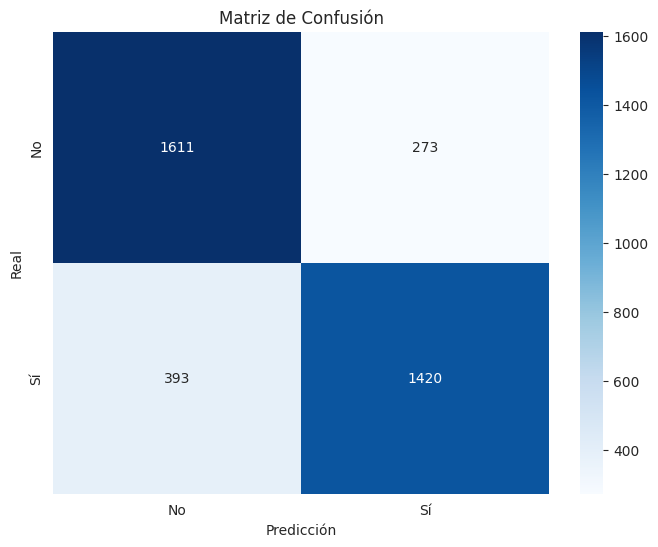

In [ ]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_val, y_pred)

# Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

### 5.10 Curva ROC y AUC

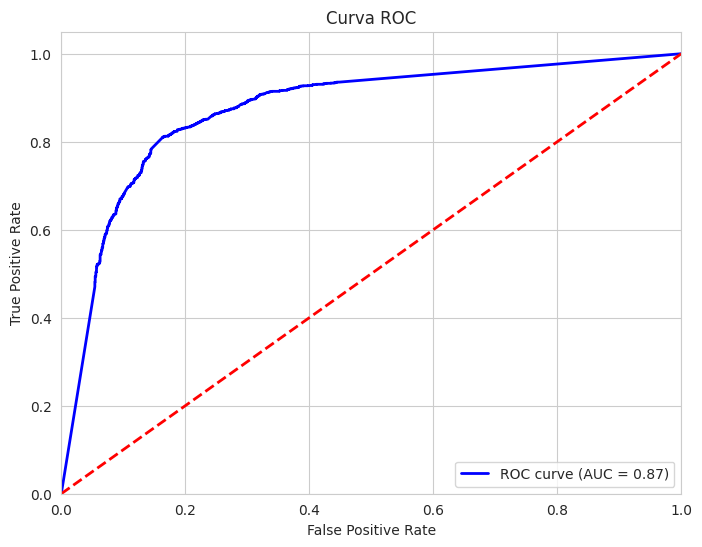

In [ ]:
# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## **Caso 6 Redes Neuronales (RNN)**

In [ ]:
import pandas as pd

df_consolidado= pd.read_csv("Ejercicio_Aplicacion_SEMMA_preprocesado2.csv")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X= df_consolidado[['Age','MaritalStatus','YearlyIncome','CommuteDistance','NumberCarsOwned','TotalChildren','NumberChildrenAtHome','Gender', 'Region_Europe',
       'Region_North America', 'Region_Pacific','SpanishEducation_Educación secundaria','HouseOwnerFlag','car',
       'SpanishEducation_Educación secundaria (en curso)',
       'SpanishEducation_Estudios de postgrado',
       'SpanishEducation_Estudios universitarios (en curso)',
       'SpanishEducation_Licenciatura', 'SpanishOccupation_Administrativo',
       'SpanishOccupation_Gestión', 'SpanishOccupation_Obrero',
       'SpanishOccupation_Obrero especializado',
       'SpanishOccupation_Profesional', 'Años_transc_ultima_compra']]
y= df_consolidado[['BikeBuyer']]

model=MinMaxScaler()
scaled_data2= model.fit_transform(X[['Age']])
X['Age']=scaled_data2


scaled_data= model.fit_transform(X[['YearlyIncome']])
X['YearlyIncome']=scaled_data

scaled_data6= model.fit_transform(X[['CommuteDistance']])
X['CommuteDistance']=scaled_data6


scaled_data3= model.fit_transform(X[['TotalChildren']])
X['TotalChildren']=scaled_data3

scaled_data4= model.fit_transform(X[['NumberChildrenAtHome']])
X['NumberChildrenAtHome']=scaled_data4

scaled_data7= model.fit_transform(X[['Años_transc_ultima_compra']])
X['Años_transc_ultima_compra']=scaled_data7

scaled_data8= model.fit_transform(X[['NumberCarsOwned']])
X['NumberCarsOwned']=scaled_data8

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2,random_state=42)

<ipython-input-66-a82dc4c4012c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age']=scaled_data2
<ipython-input-66-a82dc4c4012c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['YearlyIncome']=scaled_data
<ipython-input-66-a82dc4c4012c>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import optimizers

model=Sequential([
    Dense(143,activation='relu', input_shape=[X_train.shape[1]]),
    Dense(155, activation='relu'),
    Dense(1, activation='sigmoid')
    ])

optimizador= optimizers.Adam(learning_rate=0.0035)


model.compile(optimizer=optimizador, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7127 - loss: 0.5422 - val_accuracy: 0.7694 - val_loss: 0.4596
Epoch 2/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7675 - loss: 0.4615 - val_accuracy: 0.7836 - val_loss: 0.4324
Epoch 3/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7812 - loss: 0.4334 - val_accuracy: 0.7928 - val_loss: 0.4253
Epoch 4/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7916 - loss: 0.4254 - val_accuracy: 0.7951 - val_loss: 0.4242
Epoch 5/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7970 - loss: 0.4137 - val_accuracy: 0.7934 - val_loss: 0.4218
Epoch 6/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8027 - loss: 0.3987 - val_accuracy: 0.8005 - val_loss: 0.4097
Epoch 7/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8101 - loss: 0.3926 - val_accuracy: 0.7958 - val_loss: 0.4152
Epoch 8/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8140 - loss: 0.3888 - val_accu

In [ ]:
# Hacer predicciones (esto devuelve probabilidades)
predicciones_prob = model.predict(X_test)

# Convertir probabilidades a 0 o 1 (umbral de 0.5 para clasificar)
predicciones_clase = (predicciones_prob >= 0.5).astype(int)
# Añadir las predicciones al DataFrame (como una nueva columna)
Ejemplos = X_test.copy()  # Hacemos una copia del DataFrame original
Ejemplos['prediccion'] = predicciones_clase  # Agregar predicción correctamente
Ejemplos

116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


,Age,MaritalStatus,YearlyIncome,CommuteDistance,NumberCarsOwned,TotalChildren,NumberChildrenAtHome,Gender,Region_Europe,Region_North America,...,SpanishEducation_Estudios de postgrado,SpanishEducation_Estudios universitarios (en curso),SpanishEducation_Licenciatura,SpanishOccupation_Administrativo,SpanishOccupation_Gestión,SpanishOccupation_Obrero,SpanishOccupation_Obrero especializado,SpanishOccupation_Profesional,Años_transc_ultima_compra,prediccion
2534,0.281690,0,0.1250,0.000000,0.00,0.6,0.0,0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,1
7324,0.042254,1,0.1875,0.000000,0.50,0.0,0.0,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0
1157,0.661972,0,0.6875,0.250000,0.25,0.2,0.6,1,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0
2812,0.253521,1,0.1250,0.000000,0.50,0.4,0.4,0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.666667,1
4936,0.676056,0,0.5000,0.583333,0.25,0.8,0.0,0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,0.070423,1,0.1250,0.583333,0.50,0.0,0.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.666667,1
5418,0.169014,1,0.0000,0.000000,0.50,0.6,0.4,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0
15947,0.140845,1,0.0625,0.250000,0.25,0.0,0.0,0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1
16360,0.140845,0,0.4375,1.000000,1.00,0.0,0.0,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0


In [ ]:
Ejemplos['Clase Real']=y_test
Ejemplos

,Age,MaritalStatus,YearlyIncome,CommuteDistance,NumberCarsOwned,TotalChildren,NumberChildrenAtHome,Gender,Region_Europe,Region_North America,...,SpanishEducation_Estudios universitarios (en curso),SpanishEducation_Licenciatura,SpanishOccupation_Administrativo,SpanishOccupation_Gestión,SpanishOccupation_Obrero,SpanishOccupation_Obrero especializado,SpanishOccupation_Profesional,Años_transc_ultima_compra,prediccion,Clase Real
2534,0.281690,0,0.1250,0.000000,0.00,0.6,0.0,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,1,0
7324,0.042254,1,0.1875,0.000000,0.50,0.0,0.0,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0,1
1157,0.661972,0,0.6875,0.250000,0.25,0.2,0.6,1,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0,0
2812,0.253521,1,0.1250,0.000000,0.50,0.4,0.4,0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.666667,1,1
4936,0.676056,0,0.5000,0.583333,0.25,0.8,0.0,0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,0.070423,1,0.1250,0.583333,0.50,0.0,0.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.666667,1,1
5418,0.169014,1,0.0000,0.000000,0.50,0.6,0.4,0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0,0
15947,0.140845,1,0.0625,0.250000,0.25,0.0,0.0,0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1,1
16360,0.140845,0,0.4375,1.000000,1.00,0.0,0.0,1,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0,0


In [ ]:
from sklearn.metrics import accuracy_score ,precision_score, recall_score, f1_score

# Calcular precisión
precision_RNN = accuracy_score(y_test, predicciones_clase)
precision_metric_RNN = precision_score(y_test, predicciones_clase)
recall_metric_RNN = recall_score(y_test, predicciones_clase)
f1_metric_RNN = f1_score(y_test, predicciones_clase)

print(f'Precisión del modelo(Accuracy): {precision_RNN * 100:.2f}%')
print(f'Precisión (Precision): {precision_metric_RNN:.2f}')
print(f'Sensibilidad (Recall): {recall_metric_RNN:.2f}')
print(f'F1-Score: {f1_metric_RNN :.2f}')

Precisión del modelo(Accuracy): 82.45%
Precisión (Precision): 0.83
Sensibilidad (Recall): 0.80
F1-Score: 0.82


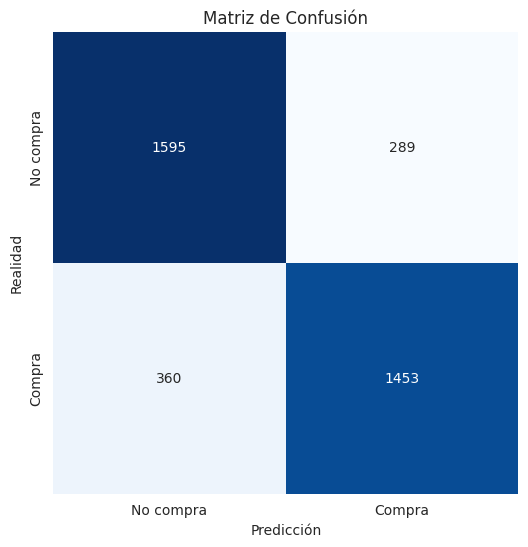

Matriz de Confusión:
[[1595  289]
 [ 360 1453]]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predicciones_clase)

# Mostrar la matriz de confusión con un mapa de calor
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['No compra', 'Compra'], yticklabels=['No compra', 'Compra'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Mostrar la matriz de confusión en formato numérico
print("Matriz de Confusión:")
print(conf_matrix)

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


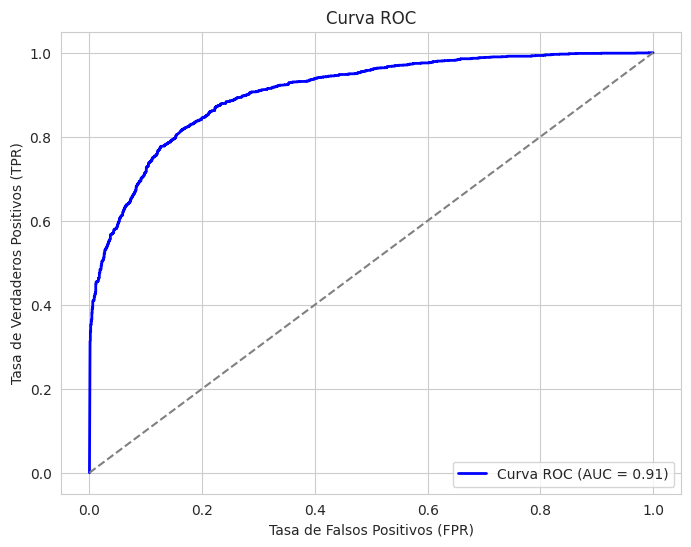

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
# Calcular la matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1. Calcular las probabilidades de las predicciones (en vez de 0 o 1)
predicciones_prob = model.predict(X_test)  # Usamos las probabilidades, no las clases

# 2. Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, predicciones_prob)  # Calcula los FPR y TPR
roc_auc = auc(fpr, tpr)  # Área bajo la curva

# 3. Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal (no discriminativa)
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.show()

# 5. EVALUACIÓN

## 5.1 Extraemos las metricas de los 6 modelos

In [ ]:
# Crear el diccionario con métricas
model_metrics = {
    "Modelo": ["SVM", "Regresión Logística", "Random Forest", "XGBoost", "KNN", "Red Neuronal"],
    "Accuracy": [accuracy_SVM, accuracy_rl, test_accuracy_forest, accuracy_xgboost, accuracy_knn, precision_RNN],
    "Precision": [precision_metric_SVM, precision_rl, test_precision_forest, precision_xgboost, precision_knn, precision_metric_RNN],
    "Recall": [recall_metric_SVM, recall_rl, test_recall_forest, recall_xgboost, recall_knn, recall_metric_RNN],
    "F1-Score": [f1_metric_SVM, f1_rl, test_f1_forest, f1_xgboost, f1_knn, f1_metric_RNN]
}

# Crear DataFrame
df_modelos = pd.DataFrame(model_metrics)

# Mostrar tabla
print("📋 Comparativa de Modelos de Clasificación:")
df_modelos

📋 Comparativa de Modelos de Clasificación:


,Modelo,Accuracy,Precision,Recall,F1-Score
0,SVM,0.794969,0.820279,0.745174,0.780925
1,Regresión Logística,0.730322,0.755639,0.665196,0.707539
2,Random Forest,0.853665,0.862187,0.835080,0.848417
3,XGBoost,0.853124,0.857948,0.839493,0.848620
4,KNN,0.819854,0.838748,0.783232,0.810040
5,Red Neuronal,0.824452,0.834099,0.801434,0.817440


## 5.2 Grafica Comparativa

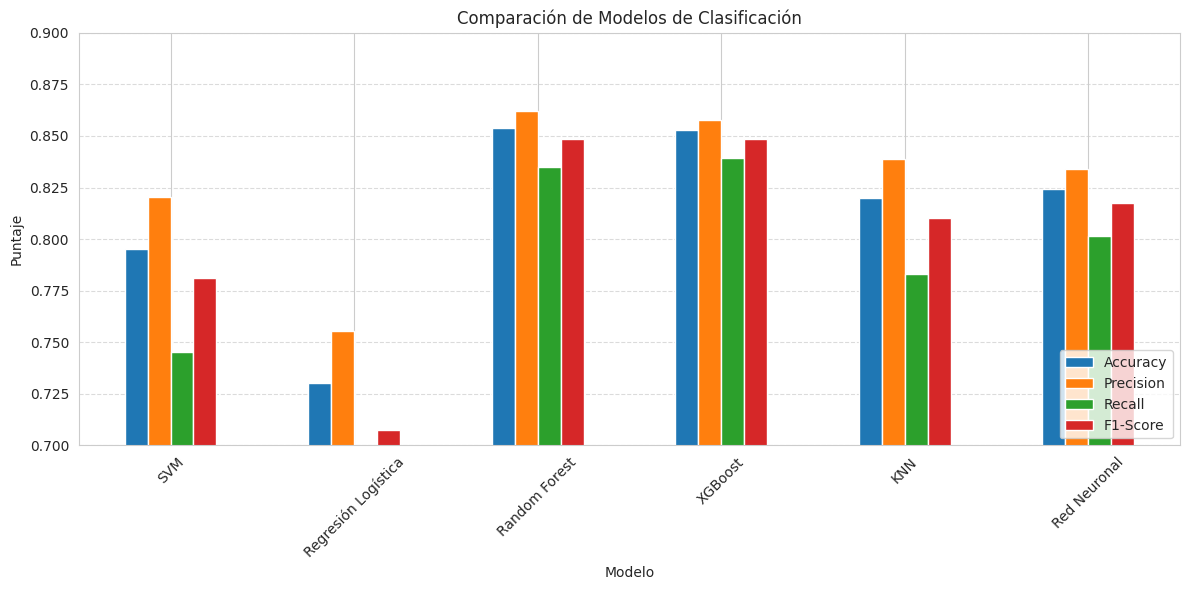

In [ ]:
# Gráfico
df_modelos.set_index("Modelo")[["Accuracy", "Precision", "Recall", "F1-Score"]].plot(
    kind='bar', figsize=(12, 6)
)
plt.title("Comparación de Modelos de Clasificación")
plt.ylabel("Puntaje")
plt.ylim(0.7, 0.9)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## 5.3 Consideraciones de Implementación para el Modelo de Clasificación

Antes de implementar el modelo entrenado en un entorno del mundo real, es fundamental tener en cuenta los siguientes aspectos clave:

🔁 **Frecuencia de actualización del modelo:**  
Los datos pueden evolucionar con el tiempo. Por eso, es posible que el modelo de clasificación necesite ser reentrenado periódicamente para mantener su rendimiento, especialmente si se detectan cambios en los patrones de comportamiento de los usuarios o clientes.

📉 **Monitoreo del desempeño:**  
Es crucial implementar un sistema de monitoreo que permita evaluar el rendimiento del modelo en producción. Se deben seguir métricas como la precisión, recall o F1-score en tiempo real, con alertas ante cualquier caída significativa.

🧠 **Explicabilidad del modelo:**  
Aunque modelos como Random Forest ofrecen un buen rendimiento, puede ser importante explicar por qué se clasificó a un usuario como "comprador" o "no comprador". Esto es útil para generar confianza en los usuarios finales y para cumplir requisitos normativos. Se pueden usar herramientas como SHAP o LIME para mejorar la interpretabilidad.

⚙️ **Escalabilidad:**  
La infraestructura debe ser capaz de manejar la carga de predicciones necesarias, especialmente si se integra el modelo en un sistema en línea que reciba muchas solicitudes simultáneas.

🔚 **Finalización del proceso SEMMA:**  
Con la evaluación completa y la elección del mejor modelo de clasificación (en este caso, **Random Forest**), se cierra el ciclo SEMMA. El modelo ya está listo para su implementación en producción, acompañado de todas las medidas necesarias para garantizar su fiabilidad y utilidad a largo plazo.


##  5.4 Fase ASSESS – Evaluación del modelo como tal

En esta etapa del proceso SEMMA, se evalúa el rendimiento de los modelos aplicados utilizando métricas de clasificación como:

- **Accuracy** (precisión general del modelo)
- **Precision** (proporción de verdaderos positivos entre todos los predichos como positivos)
- **Recall** (capacidad del modelo para encontrar todos los casos positivos)
- **F1-Score** (media armónica entre precisión y recall)

Se compararon seis modelos: SVM, Regresión Logística, Random Forest, XGBoost, KNN y Red Neuronal.  
A continuación, se presentan los resultados:

## 📊 Comparativa de Modelos de Clasificación

| Modelo               | Accuracy | Precision | Recall  | F1-Score |
|----------------------|----------|-----------|---------|----------|
| SVM                  | 0.794989 | 0.820279  | 0.745174| 0.780925 |
| Regresión Logística  | 0.730322	| 0.755639	| 0.665196| 0.707539 |
| Random Forest        | 0.853665 | 0.862187  | 0.835080| 0.848417 |
| XGBoost              | 0.853124 | 0.857948  | 0.839493| 0.848620 |
| KNN                  | 0.819854 | 0.838748  | 0.783232| 0.810040 |
| Red Neuronal         | 0.824452 | 0.834099  | 0.801434| 0.817440 |

**✅ Conclusión**: El modelo **Random Forest** obtuvo los mejores resultados en *todas* las métricas clave y más respecto al Accuracy con un valor de 85.36 % y una curva ROC (AUC) de 0.93 representa la probabilidad de que el modelo, si se da un ejemplo positivo y negativo elegido al azar, por lo que fue seleccionado como modelo final,
siendo muy ligeramente superior al XGBoost , aunque ambos modelos serian los mas indicados para este contexto

Además, se visualizó la **matriz de confusión** y el **reporte de clasificación**, los cuales confirmaron la capacidad del modelo para predecir con alta precisión tanto positivos como negativos.


# Guardamos el modelo

In [ ]:
## Guardamos el mejor modelo encontrado

In [ ]:
import joblib

# Guardar el mejor modelo entrenado
joblib.dump(best_rf, "modelo_random_forest_final.pkl")

print("✅ Modelo Random Forest guardado correctamente.")


✅ Modelo Random Forest guardado correctamente.
